In [240]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy.integrate import odeint

### Question 1

In [225]:
# derivative function

def deriv(f,x0,h):
    return [ ( f(x0+h)-f(x0) ) / h, ( f(x0+h) - f(x0-h) ) / (2*h) ]

In [226]:
# initialize h space, compute derivatives and errors

hs = np.linspace(10**(-5),10**(-3),100)
derivs = np.array([deriv(np.sin,0.1,h) for h in hs]).T
err = np.abs(derivs-np.cos(0.1))/np.cos(0.1)

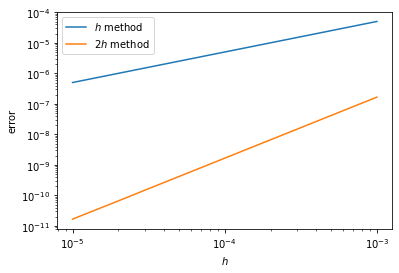

In [227]:
# plot errors

plt.loglog(hs,err[0], label = '$h$ method')
plt.loglog(hs,err[1], label = '$2h$ method')
plt.xlabel('$h$')
plt.ylabel('error')
plt.legend()
plt.savefig('figs/deriv_err.png')
plt.show()

### Question 2

In [228]:
# function computing the iterative equation

def iterate(x,y,upper_bd=2,steps=50,binary=True):
    c = complex(x,y)
    z_i = 0
    count = 0
    if binary == True:
        for i in range(steps):
            if abs(z_i) > upper_bd:
                return 0
            z_i = z_i**2 + c
        return 1
    else:
        for i in range(steps):
            count += 1
            if abs(z_i) > upper_bd:
                return 0
            z_i = z_i**2 + c
        return count

In [229]:
# compute complex plane for binary colour scheme

xs = np.linspace(-2,2,1000)
ys = np.linspace(-2,2,1000)

grid = np.zeros((len(xs),len(ys)))

for i in tqdm(range(len(xs))):
    for j in range(len(ys)):
        grid[i][j] = iterate(xs[i-len(xs)],ys[j-len(xs)])

100%|██████████| 1000/1000 [00:03<00:00, 294.18it/s]


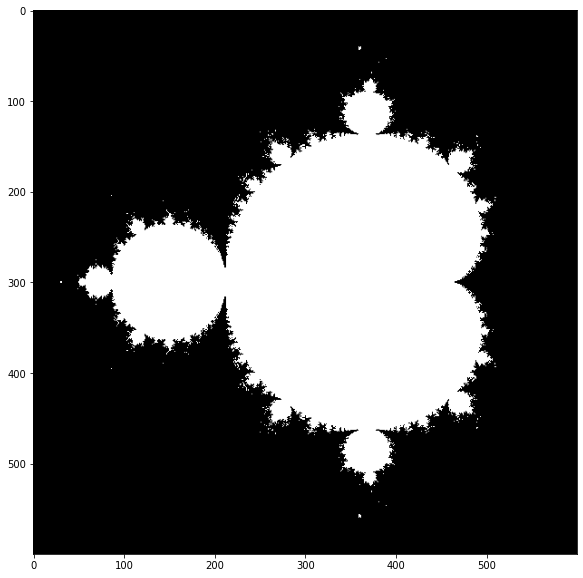

In [230]:
# plot binary image

plt.figure(figsize = (10,10))
plt.imshow(grid.T[200:800,100:700],cmap=plt.cm.gray)
plt.savefig('figs/mandelbrot_binary.png')
plt.show()

In [231]:
# compute complex plane for multicolour scheme

for i in tqdm(range(len(xs))):
    for j in range(len(ys)):
        grid[i][j] = iterate(xs[i-len(xs)],ys[j-len(xs)],binary=False)

100%|██████████| 1000/1000 [00:03<00:00, 260.10it/s]


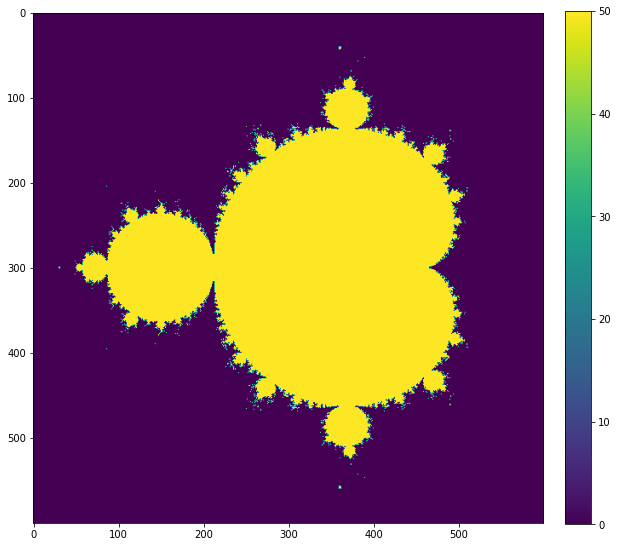

In [232]:
# plot multicolour image

plt.figure(figsize = (10,10))
plt.imshow(grid.T[200:800,100:700])
plt.colorbar(fraction=0.046, pad=0.04)
plt.savefig('figs/mandelbrot_multi.png')

### Question 3

In [333]:
# Function to compute ODEs

def SIR(y,t,gamma,beta,N):
    S,I,R = y
    bt = beta*S*I/N #beta term
    gt = gamma*I #gamma term
    return [ -bt, bt-gt, gt ]

In [396]:
N = 1000
t = np.linspace(0,200,1000)

# gamma,beta pairs
pairs = [[0.02,0.2],[0.1,0.2],[0.2,0.02]]

# init conds
S0 = 999
I0 = 1
R0 = 0

y0 = [S0,I0,R0]

# solve ODEs for each beta,gamma pair
sols = [odeint(SIR, y0, t, args=(pairs[i][0],pairs[i][1],N)) for i in range(len(pairs))]

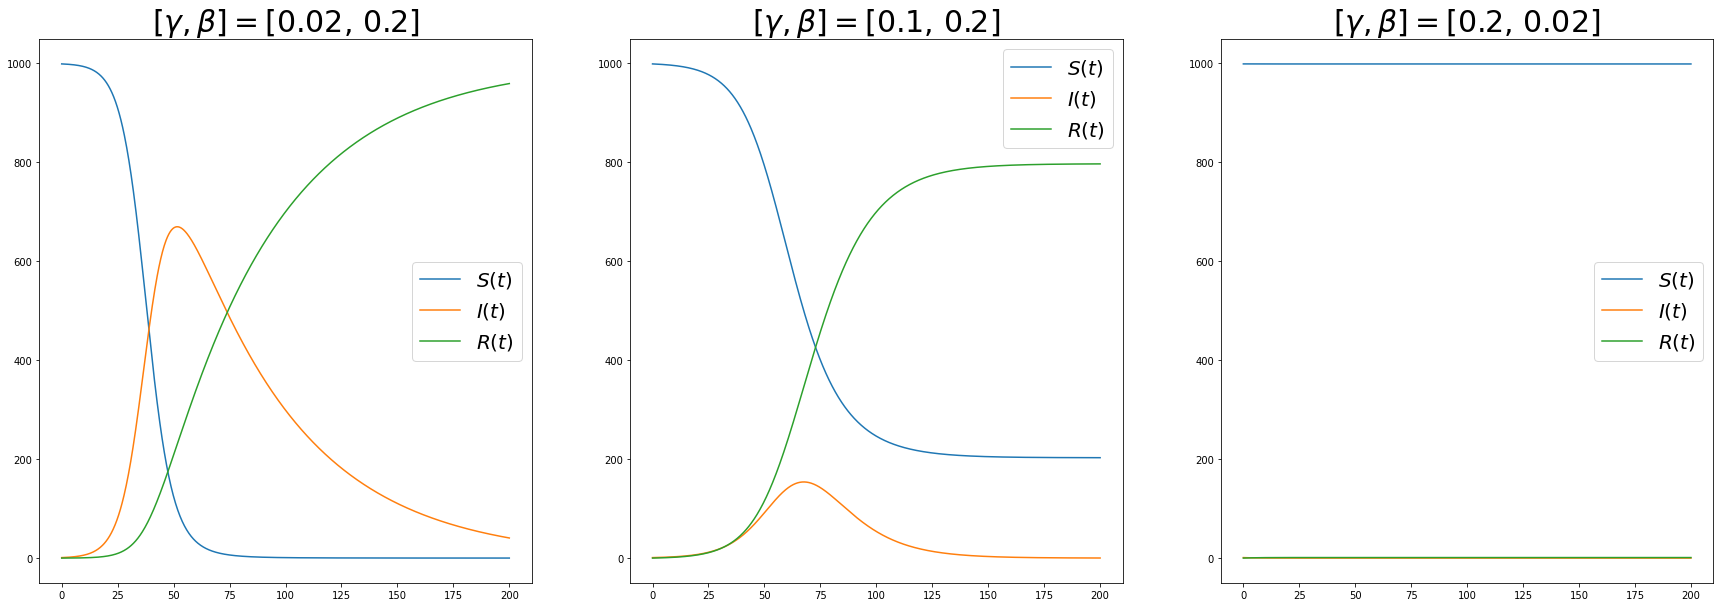

In [398]:
# plot solutions

fig, ax = plt.subplots(1, 3,)
fig.set_figheight(10)
fig.set_figwidth(30)
labels = ['$S(t)$','$I(t)$','$R(t)$']
for i in range(len(pairs)):
    for j in range(len(y0)):
        ax.flatten()[i].plot(t,sols[i][:,j],label=labels[j])
        ax.flatten()[i].legend(loc='best', fontsize=20)
        title = r'$[\gamma,\beta]=$' + str(pairs[i])
        ax.flatten()[i].set_title(title,fontsize=30)
plt.savefig('figs/SIR.png')
plt.show()